<a href="https://mybinder.org/v2/gh/homalg-project/CapHomalgNotebooks/master?filepath=TiltingEquivalence.ipynb" target="_top"><img src="https://img.shields.io/badge/Launch%20homalg%E2%80%93project%20version%20interactively%20on-binder-579ACA.svg?logo=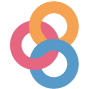" alt="binder"></a>



## Tilting equivalence

Let $k$ be field of characteristic $0$ and $\mathrm{D}^\mathrm{b}(\mathfrak{Coh}\, \mathbb{P}^2_k)$ denote the bounded derived category of coherent sheaves on $\mathbb{P}^2_k$.

Consider the full strong exceptional collection $\{\mathcal{O}(0), \mathcal{O}(1), \mathcal{O}(2)\} \subset \mathfrak{Coh}\, \mathbb{P}^2_k$ of the three twisted line bundles with their tilting object
$$
  T_\mathcal{O} := \mathcal{O}(0) \oplus \mathcal{O}(1) \oplus \mathcal{O}(2) \mbox{.}
$$

Consider the second full strong exceptional collection $\{ \Omega^0(0), \Omega^1(1), \Omega^2(2) = \mathcal{O}(0)\} \subset \mathfrak{Coh}\, \mathbb{P}^2_k$ of twisted contangent bundles with their tilting object
$$
  T_\Omega := \Omega^0(0) \oplus \Omega^1(1) \oplus \Omega^2(2) \mbox{.}
$$

Then
$$
  \mathrm{D}^\mathrm{b}(\mathfrak{Coh}\, \mathbb{P}^2_k) \simeq \mathrm{D}^\mathrm{b}(\mathrm{End}\, T_\Omega) \simeq \mathrm{D}^\mathrm{b}(\mathrm{End}\, T_\mathcal{O}) \mbox{,}
$$
where for a finite dimensional $k$-algebra $A$ we denote by $\mathrm{D}^\mathrm{b}(A) := \mathrm{D}^\mathrm{b}(A\mathrm{-mod})$ the bounded derived category of the Abelian category $A\mathrm{-mod}$ of finite dimensional $A$-modules.


In this notebook we will consider $T_\Omega$ as a tilting object in $\mathrm{D}^\mathrm{b}(\mathrm{End}\, T_\mathcal{O})$ and construct tilting equivalences
$$
  F: \mathrm{D}^\mathrm{b}(\operatorname{End}\, T_\Omega) \rightleftarrows \mathrm{D}^\mathrm{b}(\operatorname{End}\, T_\mathcal{O}) : G \mbox{.}
$$

For a finite dimensional algebra $A$ over a field $k$ we define its decomposition algebroid $A_\mathrm{dec}$ as the $k$-linear full subcategory of $\mbox{mod-}A$ consisting of the summands of a direct sum decomposition of $A$ in indecomposables, which are necessarily projective right $A$-modules. The additive closure $A_\mathrm{dec}^\oplus$ of the algebroid $A_\mathrm{dec}$ is then the closure of $A$ (considered as a linear category on one object) under direct sums and direct summands (in $\mbox{mod-}A$). One recovers $A$ as the direct sum of the $\mathrm{Hom}$-groups of $A_\mathrm{dec}$. If $A_\mathrm{sdec}$ is a skeleton of $A_\mathrm{dec}$, then the direct sum of $\mathrm{Hom}$-groups of $A_\mathrm{sdec}$ is the basic algebra which is Morita-equivalent to $A$.

The category $A_{\mathrm{dec}}^{\oplus} \simeq A_{\mathrm{sdec}}^{\oplus}$ is a model for the additive full subcategory of projective objects in $\mbox{mod-}A$, where the second model is skeletal.

We model $\mbox{mod-}A$ as the functor category $[A, k\mbox{-vec}]$, where $A$ is viewed as an algebroid with one object and the precomposition of two morphisms $r\bullet s$ is simply their product $rs$; and $k\mbox{-vec}$ is the (skeletal) Abelian category of finite dimensional $k$-vector spaces. This is equivalent to the category of representations of the quiver underlying the algebroid $(A^\mathrm{op})^\mathrm{dec} \simeq (A^\mathrm{dec})^\mathrm{op}$. The identification of $A^\mathrm{dec}$ with the $k$-linear full subcategory of indecomposable projective objects in the Abelian category $A\mathrm{-mod} := [A^\mathrm{op}, k\mathrm{-vec}] \simeq [(A^\mathrm{op})^\mathrm{dec}, k\mathrm{-vec}] \simeq [(A^\mathrm{dec})^\mathrm{op}, k\mathrm{-vec}]$ is then nothing but Yoneda's embedding. This embedding factors over the embedding $A^\mathrm{dec}_\oplus \hookrightarrow [(A^\mathrm{dec})^\mathrm{op}, k\mathrm{-vec}] \simeq A\mathrm{-mod}$.

We model the bounded derived category $\mathrm{D}^\mathrm{b}(A)$ by the bounded homotopy category $\mathrm{Ho}^\mathrm{b}\!\left(A^\mathrm{dec}_\oplus\right)$.

In [1]:
using CapAndHomalg

 ┌───────┐   GAP 4.11.1 of 2021-03-02
 │  GAP  │   https://www.gap-system.org
 └───────┘   Architecture: x86_64-pc-linux-gnu-julia64-kv7
 Configuration:  gmp 6.1.2, Julia GC, Julia 1.5.2, readline
 Loading the library and packages ...
 Packages:   GAPDoc 1.6.3, IO 4.7.1, JuliaInterface 0.5.2, PrimGrp 3.4.0, 
             SmallGrp 1.4.1, TransGrp 2.0.5
 Try '??help' for help. See also '?copyright', '?cite' and '?authors'
CapAndHomalg v1.1.3
Imported OSCAR's components GAP and Singular_jll
Type: ?CapAndHomalg for more information


---
We start by loading the GAP package `DerivedCategories` and some of the presetting which will give us the colorful output below:

In [2]:
LoadPackage( "DerivedCategories" )

In [3]:
SetSpecialSettings( )
EnhanceAllPackages( )

GAP: [ "GradedRingForHomalg", "MatricesForHomalg", "FreydCategoriesForCAP", "Algebroids", "RingsForHomalg", "ModulePresentationsForCAP", "GradedModulePresentationsForCAP", "LinearAlgebraForCAP", "FunctorCategories", "CategoryConstructor", "SubcategoriesForCAP" ]

---
Define the field of rationals over which our categories will be linear:

In [4]:
ℚ = HomalgFieldOfRationals()

GAP: Q

---
Next we define the quiver:

In [5]:
q = RightQuiver( "q_𝓞",
          [ "𝓞(0)", "𝓞(1)", "𝓞(2)" ],
          [ "x0", "x1", "x2", "y0", "y1", "y2" ],
          [ 1, 1, 1, 2, 2, 2 ],
          [ 2, 2, 2, 3, 3, 3 ] )

GAP: q_𝓞(𝓞(0),𝓞(1),𝓞(2))[x0:𝓞(0)->𝓞(1),x1:𝓞(0)->𝓞(1),x2:𝓞(0)->𝓞(1),y0:𝓞(1)->𝓞(2),y1:𝓞(1)->𝓞(2),y2:𝓞(1)->𝓞(2)]

In [6]:
SetLabelsAsLaTeXStrings( q, [ "x_0", "x_1", "x_2", "y_0", "y_1", "y_2" ] )

In [7]:
ℚq = PathAlgebra( ℚ, q )

GAP: Q * q_𝓞

In [8]:
endT_𝓞 = ℚq / [ ℚq.x0*ℚq.y1-ℚq.x1*ℚq.y0, ℚq.x0*ℚq.y2-ℚq.x2*ℚq.y0, ℚq.x1*ℚq.y2-ℚq.x2*ℚq.y1 ]

GAP: (Q * q_𝓞) / [ -1*(x1*y0) + 1*(x0*y1), -1*(x2*y0) + 1*(x0*y2), -1*(x2*y1) + 1*(x1*y2) ]

In [9]:
SetName( endT_𝓞, g"end( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) )" ); endT_𝓞

GAP: end( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) )

In [10]:
Dimension( endT_𝓞 )

15

---
Define the opposite algebra, mainly to set its name: 

In [11]:
endT_𝓞op = OppositeAlgebra( endT_𝓞 ); SetName( endT_𝓞op, g"end( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) )^op" ); endT_𝓞op

GAP: end( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) )^op

Define the additive closure $\mathrm{end}(T_\mathcal{O})_{\mathrm{oid}}^\oplus$ of the endomorphism algebroid $\mathrm{end}(T_\mathcal{O})_{\mathrm{oid}}$:

In [12]:
endT_𝓞_rows = QuiverRows( endT_𝓞 )

GAP: Quiver rows( end( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) )

Define the collection $\{\Omega^0(0), \Omega^1(1), \Omega^2(2)\}$ as a full strong exceptional collection in the bounded homotopy category 

$$K^b\left(\mathrm{end}(T_\mathcal{O})_{\mathrm{oid}}^\oplus\right) \simeq D^b(\mbox{mod-}\operatorname{end}(T_\mathcal{O})^{\mathrm{op}})$$

In [13]:
K_endT_𝓞_rows = HomotopyCategoryByCochains( endT_𝓞_rows )

GAP: Homotopy^• category( Quiver rows( end( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) )

In [14]:
Ω00_0 = QuiverRowsObject( [ [ q."𝓞(0)", 3 ] ], endT_𝓞_rows )

GAP: <An object in Quiver rows( end( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) defined by 3 quiver vertices>

In [15]:
Show( Ω00_0 )

In [16]:
Ω00_1 = QuiverRowsObject( [ [ q."𝓞(1)", 3 ] ], endT_𝓞_rows )

GAP: <An object in Quiver rows( end( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) defined by 3 quiver vertices>

In [17]:
Show( Ω00_1 )

In [18]:
Ω00_2 = QuiverRowsObject( [ [ q."𝓞(2)", 1 ] ], endT_𝓞_rows )

GAP: <An object in Quiver rows( end( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) defined by 1 quiver vertices>

In [19]:
Show( Ω00_2 )

In [20]:
d_0 = QuiverRowsMorphism(
          Ω00_0,
          [ [ endT_𝓞.x1, -endT_𝓞.x0, Zero(endT_𝓞) ],
            [ endT_𝓞.x2, Zero(endT_𝓞), -endT_𝓞.x0 ],
            [ Zero(endT_𝓞), endT_𝓞.x2, -endT_𝓞.x1 ] ],
          Ω00_1 )

GAP: <A morphism in Quiver rows( end( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) defined by a 3 x 3 matrix of quiver algebra elements>

In [21]:
IsWellDefined( d_0 )

true

In [22]:
Show( d_0 )

In [23]:
d_1 = QuiverRowsMorphism(
          Ω00_1,
          [ [ endT_𝓞.y0 ],
            [ endT_𝓞.y1 ],
            [ endT_𝓞.y2 ] ],
          Ω00_2 )

GAP: <A morphism in Quiver rows( end( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) defined by a 3 x 1 matrix of quiver algebra elements>

In [24]:
IsWellDefined( d_1 )

true

In [25]:
Show( d_1 )

In [26]:
K_endT_𝓞_rows

GAP: Homotopy^• category( Quiver rows( end( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) )

In [27]:
Ω00 = HomotopyCategoryObject( K_endT_𝓞_rows, [ d_0, d_1 ], 0 )

GAP: <An object in Homotopy^• category( Quiver rows( end( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) ) with active lower bound 0 and active upper bound 2>

In [28]:
IsWellDefined( Ω00 )

true

In [29]:
Show( Ω00 )

In [30]:
Ω11_0 = QuiverRowsObject( [ [ q."𝓞(0)", 3 ] ], endT_𝓞_rows )

GAP: <An object in Quiver rows( end( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) defined by 3 quiver vertices>

In [31]:
Ω11_1 = QuiverRowsObject( [ [ q."𝓞(1)", 1 ] ], endT_𝓞_rows )

GAP: <An object in Quiver rows( end( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) defined by 1 quiver vertices>

In [32]:
d_0 = QuiverRowsMorphism(
          Ω11_0,
          [ [ endT_𝓞.x0 ],
            [ endT_𝓞.x1 ],
            [ endT_𝓞.x2 ] ],
          Ω11_1 )

GAP: <A morphism in Quiver rows( end( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) defined by a 3 x 1 matrix of quiver algebra elements>

In [33]:
Ω11 = HomotopyCategoryObject( K_endT_𝓞_rows, [ d_0 ], 0 )

GAP: <An object in Homotopy^• category( Quiver rows( end( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) ) with active lower bound 0 and active upper bound 1>

In [34]:
Show( Ω11 )

In [35]:
Ω22_0 = QuiverRowsObject( [ [ q."𝓞(0)", 1 ] ], endT_𝓞_rows )

GAP: <An object in Quiver rows( end( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) defined by 1 quiver vertices>

In [36]:
Show( Ω22_0 )

In [37]:
Ω22 = Ω22_0 / K_endT_𝓞_rows

GAP: <An object in Homotopy^• category( Quiver rows( end( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) ) with active lower bound 0 and active upper bound 0>

In [38]:
Show( Ω22 )

In [39]:
Ω = CreateStrongExceptionalCollection(
            [  Ω00, Ω11, Ω22 ],
            [ "Ω^0(0)", "Ω^1(1)", "Ω^2(2)" ],
            [ "\\Omega^0(0)", "\\Omega^1(1)", "\\Omega^2(2)" ]
    )

GAP: <An exceptional collection defined by the objects of the The full subcategory { Ω^0(0), Ω^1(1), Ω^2(2) }>

In [40]:
endT_Ω = EndomorphismAlgebra( Ω )

GAP: end( Ω^0(0) ⊕ Ω^1(1) ⊕ Ω^2(2) )

In [41]:
Dimension( endT_Ω )

12

In [42]:
q_endT_Ω = QuiverOfAlgebra( endT_Ω )

GAP: quiver(Ω^0(0),Ω^1(1),Ω^2(2))[m1_2_1:Ω^0(0)->Ω^1(1),m1_2_2:Ω^0(0)->Ω^1(1),m1_2_3:Ω^0(0)->Ω^1(1),m2_3_1:Ω^1(1)->Ω^2(2),m2_3_2:Ω^1(1)->Ω^2(2),m2_3_3:Ω^1(1)->Ω^2(2)]

In [43]:
RelationsOfAlgebra( endT_Ω )

GAP: [ 1*(m1_2_1*m2_3_1), 1*(m1_2_2*m2_3_1) + 1*(m1_2_1*m2_3_2), 1*(m1_2_2*m2_3_2), 1*(m1_2_3*m2_3_1) + 1*(m1_2_1*m2_3_3), 1*(m1_2_3*m2_3_2) + 1*(m1_2_2*m2_3_3), 1*(m1_2_3*m2_3_3) ]

In [44]:
GlobalDimensionOfAlgebra( endT_Ω, 1 )

false

In [45]:
GlobalDimensionOfAlgebra( endT_Ω, 2 )

2

In [46]:
endT_Ω_oid = Algebroid( Ω )

GAP: Algebroid( end( Ω^0(0) ⊕ Ω^1(1) ⊕ Ω^2(2) ) )

In [47]:
Abs = IsomorphismOntoAlgebroid( Ω )

GAP: Isomorphism functor from exceptional collection onto algebroid

In [48]:
Rel = IsomorphismFromAlgebroid( Ω )

GAP: Isomorphism functor from algebroid onto exceptional collection

In [49]:
m = endT_Ω_oid."m1_2_2"

GAP: (Ω^0(0))-[{ 1*(m1_2_2) }]->(Ω^1(1))

In [50]:
Show( m )

In [51]:
Rel_m = Rel( m )

GAP: A morphism in full subcategory given by: <A morphism in Homotopy^• category( Quiver rows( end( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) ) with active lower bound 0 and active upper bound 1>

In [52]:
Show( Rel_m )

In [53]:
IsZero( PreCompose( Rel( endT_Ω_oid."m1_2_2" ), Rel( endT_Ω_oid."m2_3_2" ) ) )

true

By using the Yoneda embedding and the fact that $\mathrm{end}(T_\Omega)$ has finite global dimension, we can compute the following equivalences:

$$K^b(\Omega^\oplus)\simeq K^b(\mathrm{end}(T_\Omega)_{\mathrm{oid}}^\oplus)\simeq K^b(\mathrm{proj}(\mbox{mod-}\mathrm{end}(T_\Omega)_{\mathrm{oid}}^{\mathrm{op}}))\simeq D^b(\mbox{mod-}\mathrm{end}(T_\Omega)_{\mathrm{oid}}^{\mathrm{op}})$$


In [54]:
Ω_plus = AdditiveClosure( Ω )

GAP: Additive closure( The full subcategory { Ω^0(0), Ω^1(1), Ω^2(2) } )

In [55]:
K_Ω_plus = HomotopyCategoryByCochains( Ω_plus )

GAP: Homotopy^• category( Additive closure( The full subcategory { Ω^0(0), Ω^1(1), Ω^2(2) } ) )

In [56]:
endT_Ω_oid_plus = AdditiveClosure( endT_Ω_oid );
K_endT_Ω_oid_plus = HomotopyCategoryByCochains( endT_Ω_oid_plus )

GAP: Homotopy^• category( Additive closure( Algebroid( end( Ω^0(0) ⊕ Ω^1(1) ⊕ Ω^2(2) ) ) ) )

In [57]:
endT_Ω_oid_op = OppositeAlgebroidOverOppositeQuiverAlgebra( endT_Ω_oid )
mod_endT_Ω_oid_op = Hom( endT_Ω_oid_op, MatrixCategory( ℚ ) )
projs = FullSubcategoryGeneratedByProjectiveObjects( mod_endT_Ω_oid_op )
K_projs = HomotopyCategoryByCochains( projs )

GAP: Homotopy^• category( Full additive subcategory generated by projective objects( The category of functors: Algebroid( end( Ω^0(0) ⊕ Ω^1(1) ⊕ Ω^2(2) )^op ) -> Category of matrices over Q ) )

In [58]:
K_mod_endT_Ω_oid_op = HomotopyCategoryByCochains( mod_endT_Ω_oid_op )
D_mod_endT_Ω_oid_op = DerivedCategoryByCochains( mod_endT_Ω_oid_op )

GAP: Derived^• category( The category of functors: Algebroid( end( Ω^0(0) ⊕ Ω^1(1) ⊕ Ω^2(2) )^op ) -> Category of matrices over Q )

In [59]:
KnownFunctors( K_Ω_plus, K_endT_Ω_oid_plus )

1: Apply ExtendFunctorToHomotopyCategoriesByCochains on ( Apply ExtendFunctorToAdditiveClosures on ( Abstraction isomorphism ) )


In [60]:
Abs = Functor( K_Ω_plus, K_endT_Ω_oid_plus, 1 )

GAP: Extension of ( Extension of Isomorphism functor from exceptional collection onto algebroid to additive closures ) to homotopy categories

In [61]:
KnownFunctors( K_endT_Ω_oid_plus, K_Ω_plus )

1: Apply ExtendFunctorToHomotopyCategoriesByCochains on ( Apply ExtendFunctorToAdditiveClosures on ( Relatization isomorphism ) )


In [62]:
Rel = Functor( K_endT_Ω_oid_plus, K_Ω_plus, 1 )

GAP: Extension of ( Extension of Isomorphism functor from algebroid onto exceptional collection to additive closures ) to homotopy categories

In [63]:
KnownFunctors( K_endT_Ω_oid_plus, K_projs )

1: Apply ExtendFunctorToHomotopyCategoriesByCochains on ( Yoneda embedding )


In [64]:
𝕐 = Functor( K_endT_Ω_oid_plus, K_projs, 1 )

GAP: Extension of ( Yoneda embedding ) to homotopy categories

In [65]:
KnownFunctors( K_projs, K_endT_Ω_oid_plus )

1: Apply ExtendFunctorToHomotopyCategoriesByCochains on ( Decomposition of projective objects )


In [66]:
𝔻 = Functor( K_projs, K_endT_Ω_oid_plus, 1 )

GAP: Extension of ( Decomposition of projective objects ) to homotopy categories

In [67]:
KnownFunctors( K_projs, D_mod_endT_Ω_oid_op )

1: PreComposition of the following two functors:
     * Apply ExtendFunctorToHomotopyCategoriesByCochains on ( The inclusion functor )
     * The natural localization functor


In [68]:
𝕃 = Functor( K_projs, D_mod_endT_Ω_oid_op, 1 )

GAP: Composition of Extension of ( The inclusion functor ) to homotopy categories and Localization functor in derived category

In [69]:
KnownFunctors( D_mod_endT_Ω_oid_op, K_projs )

1: Universal functor from derived category


In [70]:
𝕌 = Functor( D_mod_endT_Ω_oid_op, K_projs, 1 )

GAP: Universal functor from derived category onto a localization category

The natural embedding $\Omega \hookrightarrow K^b(\mathrm{end}(T_\mathcal{O})_{\mathrm{oid}}^\oplus)$ can be extended to another embedding $\Omega^{\oplus} \hookrightarrow K^b(\mathrm{end}(T_\mathcal{O})_{\mathrm{oid}}^\oplus)$. The later can again be extended to the embedding 

$$K^b(\Omega^{\oplus}) \hookrightarrow K^b(K^b(\mathrm{end}(T_\mathcal{O})_{\mathrm{oid}}^\oplus)).$$

On the other hand, we have another natural embedding 

$$K^b(\mathrm{end}(T_\mathcal{O})_{\mathrm{oid}}^\oplus) \hookrightarrow K^b(K^b(\mathrm{end}(T_\mathcal{O})_{\mathrm{oid}}^\oplus)).$$


---
Now construct the tilting equivalences:
$$
  F: K^\mathrm{b} \left((\mathrm{end}\, T_\Omega)_{\mathrm{oid}}^\oplus\right) \rightleftarrows K^b(\Omega^\oplus) \rightleftarrows K^\mathrm{b} \left((\mathrm{end}\, T_\mathcal{O})_\mathrm{oid}^\oplus\right) :G
$$

In [71]:
Conv = ConvolutionFunctor( Ω )

GAP: Convolution functor

In [72]:
Display( Conv )

Convolution functor:

Homotopy^• category( Additive closure( The full subcategory { Ω^0(0), Ω^1(1), Ω^2(2) } ) )
  |
  V
Homotopy^• category( Quiver rows( end( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) )


In [73]:
IsIdenticalObj( K_Ω_plus, SourceOfFunctor( Conv ) )

true

In [74]:
IsIdenticalObj( K_endT_𝓞_rows, RangeOfFunctor( Conv ) )

true

In [75]:
Rep = ReplacementFunctor( Ω )

GAP: Replacement functor

In [76]:
Display( Rep )

Replacement functor:

Homotopy^• category( Quiver rows( end( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) )
  |
  V
Homotopy^• category( Additive closure( The full subcategory { Ω^0(0), Ω^1(1), Ω^2(2) } ) )


---
Consider the images of the three twisted line bundles $\{\mathcal{O}(0), \mathcal{O}(1), \mathcal{O}(2)\} \subset \mathrm{K}^\mathrm{b}\!\left((\mathrm{End}\, T_𝓞)^\mathrm{dec}_\oplus\right)$ under the tilting equivalence
$$
  G: \mathrm{K}^\mathrm{b}\!\left((\operatorname{End}\, T_\mathcal{O})^\mathrm{dec}_\oplus \right) \rightarrow \mathrm{K}^\mathrm{b}\!\left((\operatorname{End}\, T_\Omega)^\mathrm{dec}_\oplus \right) \mbox{.}
$$

In [77]:
𝓞0 = QuiverRowsObject( [ [ q."𝓞(0)", 1 ] ], endT_𝓞_rows ) / K_endT_𝓞_rows

GAP: <An object in Homotopy^• category( Quiver rows( end( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) ) with active lower bound 0 and active upper bound 0>

In [78]:
Show( 𝓞0 )

In [79]:
𝓞1 = QuiverRowsObject( [ [ q."𝓞(1)", 1 ] ], endT_𝓞_rows ) / K_endT_𝓞_rows

GAP: <An object in Homotopy^• category( Quiver rows( end( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) ) with active lower bound 0 and active upper bound 0>

In [80]:
Show( 𝓞1 )

In [81]:
𝓞2 = QuiverRowsObject( [ [ q."𝓞(2)", 1 ] ], endT_𝓞_rows ) / K_endT_𝓞_rows

GAP: <An object in Homotopy^• category( Quiver rows( end( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) ) with active lower bound 0 and active upper bound 0>

In [82]:
Show( 𝓞2 )

In [83]:
Rep_𝓞0 = Rep( 𝓞0 )

GAP: <An object in Homotopy^• category( Additive closure( The full subcategory { Ω^0(0), Ω^1(1), Ω^2(2) } ) ) with active lower bound 0 and active upper bound 0>

In [84]:
Show( Abs( Rep_𝓞0 ) )

In [85]:
Rep_𝓞1 = Rep( 𝓞1 )

GAP: <An object in Homotopy^• category( Additive closure( The full subcategory { Ω^0(0), Ω^1(1), Ω^2(2) } ) ) with active lower bound -1 and active upper bound 0>

In [86]:
Show( Abs( Rep_𝓞1 ) )

In [87]:
Rep_𝓞2 = Rep( 𝓞2 )

GAP: <An object in Homotopy^• category( Additive closure( The full subcategory { Ω^0(0), Ω^1(1), Ω^2(2) } ) ) with active lower bound -2 and active upper bound 0>

In [88]:
Show( Abs( Rep_𝓞2 ) )

In [93]:
C = RandomObject( K_endT_𝓞_rows, julia_to_gap( [ -1, 1, 2 ] ) )

GAP: <An object in Homotopy^• category( Quiver rows( end( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) ) with active lower bound -1 and active upper bound 1>

In [101]:
Show( C )

In [102]:
ConvRep_C = Conv( Rep( C ) )

GAP: <An object in Homotopy^• category( Quiver rows( end( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) ) with active lower bound -1 and active upper bound 2>

In [107]:
Show( ConvRep_C )

In [104]:
ϵ = CounitOfConvolutionReplacementAdjunction( Ω )

GAP: Conv( Rep( - ) ) => Id

In [105]:
ϵ_C = ϵ( C )

GAP: <A morphism in Homotopy^• category( Quiver rows( end( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) ) with active lower bound -1 and active upper bound 1>

In [109]:
Show( ϵ_C )

In [110]:
IsIsomorphism( ϵ_C )

true

In [111]:
iϵ_C = InverseForMorphisms( ϵ_C )

GAP: <A morphism in Homotopy^• category( Quiver rows( end( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) ) with active lower bound -1 and active upper bound 1>

In [113]:
Show( iϵ_C )

---
Construct the equivalence

$$
  I: \mathrm{K}^\mathrm{b}\!\left((\operatorname{End}\, T_\mathcal{\Omega})_\mathrm{oid}^\oplus \right) \to \mathrm{D}^\mathrm{b}(\mathrm{End}\, T_\mathcal{\Omega}) \mbox{.}
$$


In [135]:
𝕀 = PreCompose( [ Rep, Abs, 𝕐, 𝕃 ] )

GAP: Composition of Composition of Composition of Replacement functor and Extension of ( Extension of Isomorphism functor from exceptional collection onto algebroid to additive closures ) to homotopy categories and Extension of ( Yoneda embedding ) to homotopy categories and Composition of Extension of ( The inclusion functor ) to homotopy categories and Localization functor in derived category

In [136]:
Display( 𝕀 )

Composition of Composition of Composition of Replacement functor and Extension of ( Extension of Isomorphism functor from exceptional collection onto algebroid to additive closures ) to homotopy categories and Extension of ( Yoneda embedding ) to homotopy categories and Composition of Extension of ( The inclusion functor ) to homotopy categories and Localization functor in derived category:

Homotopy^• category( Quiver rows( end( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) )
  |
  V
Derived^• category( The category of functors: Algebroid( end( Ω^0(0) ⊕ Ω^1(1) ⊕ Ω^2(2) )^op ) -> Category of matrices over Q )


---
Compute the images of $G(\mathcal{O}(i)) \in \mathrm{K}^\mathrm{b}\!\left((\operatorname{End}\, T_\Omega)^\mathrm{dec}_\oplus \right)$ in the derived catgeory $\mathrm{D}^\mathrm{b}(\mathrm{End}\, T_\Omega)$. All of them turn out to lie in the Abelian heart of the latter:

In [137]:
𝕀_𝓞0 = 𝕀( 𝓞0 )

GAP: <An object in Derived^• category( The category of functors: Algebroid( end( Ω^0(0) ⊕ Ω^1(1) ⊕ Ω^2(2) )^op ) -> Category of matrices over Q ) with active lower bound 0 and active upper bound 0>

In [138]:
CohomologySupport( 𝕀_𝓞0 )

GAP: [ 0 ]

---
This homology is concentrated in degree $0$ and hence isomorphic to the image $J( G ( \mathcal{O}(0) ) )$ in $\mathrm{D}^\mathrm{b}(\mathrm{End}\, T_\Omega)$.
It is, as an object in $(\mathrm{End}\, T_\Omega)\mathrm{-mod}$ represented by a functor $((\operatorname{End}\, T_\Omega)^\mathrm{dec})^\mathrm{op} \rightarrow \mathbb{Q}\mathrm{-vec}$:

In [139]:
H0_𝕀_𝓞0 = CohomologyAt( 𝕀_𝓞0, 0 )

GAP: <(Ω^0(0))->3, (Ω^1(1))->3, (Ω^2(2))->1; (m1_2_1)->3x3, (m1_2_2)->3x3, (m1_2_3)->3x3, (m2_3_1)->1x3, (m2_3_2)->1x3, (m2_3_3)->1x3>

In [143]:
Show( H0_𝕀_𝓞0 )

In [145]:
𝕀_𝓞1 = 𝕀( 𝓞1 )

GAP: <An object in Derived^• category( The category of functors: Algebroid( end( Ω^0(0) ⊕ Ω^1(1) ⊕ Ω^2(2) )^op ) -> Category of matrices over Q ) with active lower bound -1 and active upper bound 0>

In [146]:
CohomologySupport( 𝕀_𝓞1 )

GAP: [ 0 ]

In [147]:
H0_𝕀_𝓞1 = CohomologyAt( 𝕀_𝓞1, 0 )

GAP: <(Ω^0(0))->6, (Ω^1(1))->8, (Ω^2(2))->3; (m1_2_1)->8x6, (m1_2_2)->8x6, (m1_2_3)->8x6, (m2_3_1)->3x8, (m2_3_2)->3x8, (m2_3_3)->3x8>

In [150]:
Show( H0_𝕀_𝓞1 )

In [151]:
𝕀_𝓞2 = 𝕀( 𝓞2 )

GAP: <An object in Derived^• category( The category of functors: Algebroid( end( Ω^0(0) ⊕ Ω^1(1) ⊕ Ω^2(2) )^op ) -> Category of matrices over Q ) with active lower bound -2 and active upper bound 0>

In [152]:
CohomologySupport( 𝕀_𝓞2 )

GAP: [ 0 ]

In [153]:
H0_𝕀_𝓞2 = CohomologyAt( 𝕀_𝓞2, 0 )

GAP: <(Ω^0(0))->10, (Ω^1(1))->15, (Ω^2(2))->6; (m1_2_1)->15x10, (m1_2_2)->15x10, (m1_2_3)->15x10, (m2_3_1)->6x15, (m2_3_2)->6x15, (m2_3_3)->6x15>

In [157]:
Display( H0_𝕀_𝓞2 )

An object in The category of functors: Algebroid( end( Ω^0(0) ⊕ Ω^1(1) ⊕ Ω^2(2) )^op ) -> Category of matrices over Q defined by the following data:


Image of <(Ω^0(0))>:
A vector space object over Q of dimension 10

Image of <(Ω^1(1))>:
A vector space object over Q of dimension 15

Image of <(Ω^2(2))>:
A vector space object over Q of dimension 6

Image of (Ω^1(1))-[{ 1*(m1_2_1) }]->(Ω^0(0)):
[ [   0,   0,  -1,   0,   0,   0,   0,   0,   0,   0 ],
  [   0,   1,   0,   0,   0,   0,   0,   0,   0,   0 ],
  [   0,   0,   0,   0,   0,   0,  -1,   0,   0,   0 ],
  [   0,   0,   0,   0,   1,   0,   0,   0,   0,   0 ],
  [   0,   0,   0,   0,   0,   0,   0,   0,   0,  -1 ],
  [   0,   0,   0,   0,   0,   0,   1,   0,   0,   0 ],
  [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0 ],
  [   0,   0,   0,   0,   0,   1,   0,   0,   0,   0 ],
  [   0,   0,   0,  -1,   0,   0,   0,   0,   0,   0 ],
  [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0 ],
  [   0,   0,   0,   0,   0,   0,   0,   0,